<a href="https://colab.research.google.com/github/darshikapanwar009/Machine-Learning/blob/main/XORgate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 0, Loss: 0.2500
Epoch 1000, Loss: 0.2099
Epoch 2000, Loss: 0.0512
Epoch 3000, Loss: 0.0159
Epoch 4000, Loss: 0.0084
Epoch 5000, Loss: 0.0056
Epoch 6000, Loss: 0.0041
Epoch 7000, Loss: 0.0032
Epoch 8000, Loss: 0.0026
Epoch 9000, Loss: 0.0022

Predictions:
[0 0] → 0
[0 1] → 1
[1 0] → 1
[1 1] → 0


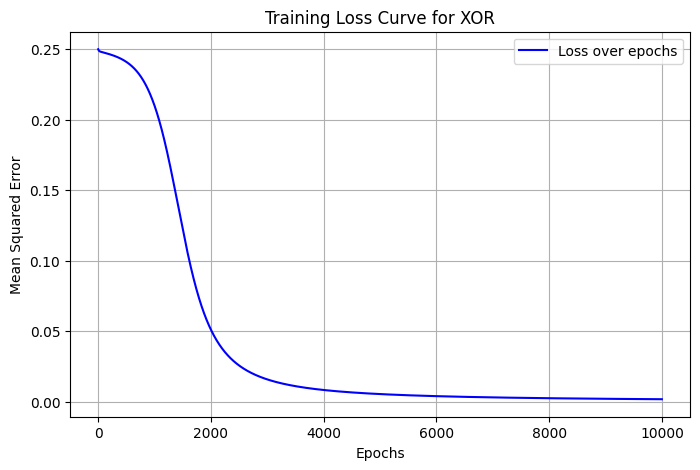

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x) * (1 - sigmoid(x))

# MLP class
class MLP_XOR:
    def __init__(self, input_size, hidden_size, output_size, lr=0.1, epochs=10000):
        self.lr = lr
        self.epochs = epochs
        self.loss_history = []

        # Initialize weights and biases
        self.w1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))
        self.w2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros((1, output_size))

    def forward(self, x):
        self.z1 = np.dot(x, self.w1) + self.b1
        self.a1 = sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.w2) + self.b2
        self.a2 = sigmoid(self.z2)
        return self.a2

    def backward(self, x, y, output):
        error = output - y
        d_z2 = error * sigmoid_deriv(self.z2)
        d_w2 = np.dot(self.a1.T, d_z2)

        d_z1 = np.dot(d_z2, self.w2.T) * sigmoid_deriv(self.z1)
        d_w1 = np.dot(x.T, d_z1)

        # Update weights and biases
        self.w1 -= self.lr * d_w1
        self.b1 -= self.lr * np.sum(d_z1, axis=0, keepdims=True)
        self.w2 -= self.lr * d_w2
        self.b2 -= self.lr * np.sum(d_z2, axis=0, keepdims=True)

    def train(self, X, Y):
        for i in range(self.epochs):
            output = self.forward(X)
            self.backward(X, Y, output)
            loss = np.mean((output - Y) ** 2)
            self.loss_history.append(loss)
            if i % 1000 == 0:
                print(f"Epoch {i}, Loss: {loss:.4f}")

    def predict(self, X):
        output = self.forward(X)
        return np.round(output)

    def plot_loss(self):
        plt.figure(figsize=(8,5))
        plt.plot(self.loss_history, label="Loss over epochs", color="blue")
        plt.xlabel("Epochs")
        plt.ylabel("Mean Squared Error")
        plt.title("Training Loss Curve for XOR")
        plt.grid(True)
        plt.legend()
        plt.show()

# XOR dataset
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([[0],[1],[1],[0]])

# Train the model
model = MLP_XOR(input_size=2, hidden_size=2, output_size=1)
model.train(X, Y)

# Predictions
predictions = model.predict(X)
print("\nPredictions:")
for i in range(len(X)):
    print(f"{X[i]} → {int(predictions[i][0])}")

# Plot the loss graph
model.plot_loss()
